<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#모듈
import numpy as np
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [19]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])
batch_size = 16

In [20]:
#MNIST DATA
data_train = datasets.MNIST(root = 'MNIST_data',
                             download=True,
                             train=False,
                             transform=transform1
                             )
data_test = datasets.MNIST(root = 'MNIST_data', 
                             train= True, 
                             download=True, 
                             transform= transform1)

In [21]:
print("the number of your training data (must be 10,000) = ", data_train.__len__())
print("hte number of your testing data (must be 60,000) = ", data_test.__len__())


the number of your training data (must be 10,000) =  10000
hte number of your testing data (must be 60,000) =  60000


In [22]:
train_loader = torch.utils.data.DataLoader(dataset = data_train,
                                          batch_size=batch_size,
                                          shuffle = True,
                                          drop_last = True)
test_loader = torch.utils.data.DataLoader(dataset = data_test,
                                          batch_size=batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [23]:
len(train_loader)

625

In [24]:
len(test_loader)

3750

In [25]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()

        self.classifier1 = nn.Sequential(
            nn.Linear(784,48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            #nn.Dropout(),
            ##### Hidden Layer '1' #####
            nn.Linear(48,24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            #nn.Dropout(),
            #nn.Linear(24,12),
            #nn.BatchNorm1d(12),
            #nn.ReLU(),
            
            nn.Linear(24,10),
            #nn.Dropout(),
            nn.LogSoftmax(dim=1)
            
        )
    def forward(self, x) :
        x = x.view(x.size(0),-1)
        x = self.classifier1(x)
        return x 

In [26]:
classifier = classification().to(device)
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss().to(device)
training_loss_history = []
training_accuracy_history = []
testing_loss_history = []
testing_accuracy_history = []

In [27]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [28]:
epochs = 60

In [29]:
for epoch in range(1,epochs+1) :
    classifier.train()
    training_loss = 0
    training_correct = 0
    for i, (data,target) in enumerate(train_loader) :
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        result = classifier(data)

        loss   = F.nll_loss(result, target)
        training_loss += F.nll_loss(result, target, reduction = 'sum').item()

        prediction = result.max(dim = 1, keepdim = True)[1]
        training_correct += prediction.eq(target.view_as(prediction)).sum().item()

        loss.backward()

        optimizer.step()
    training_loss /= len(train_loader.dataset)
    training_accuracy = 100 * training_correct / len(train_loader.dataset)
    training_loss_history.append(training_loss)
    training_accuracy_history.append(training_accuracy)

    classifier.eval()
    testing_loss = 0
    testing_correct = 0
    with torch.no_grad() :
      for data, target in test_loader :
        data, target = data.to(device), target.to(device)
        
        result2 = classifier(data)

        loss2 = F.nll_loss(result2, target)
        testing_loss += F.nll_loss(result2, target,reduction = 'sum').item()

        prediction2 = result2.max(1, keepdim=True)[1]
        testing_correct += prediction2.eq(target.view_as(prediction2)).sum().item()
    testing_loss /= len(test_loader.dataset) 
    testing_accuracy = 100 * testing_correct / len(test_loader.dataset)
    testing_loss_history.append(testing_loss)
    testing_accuracy_history.append(testing_accuracy)

In [30]:
training_accuracy

98.93

In [31]:
testing_accuracy

95.38166666666666

In [ ]:
epochs

50

In [ ]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=256),
            nn.ReLU(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=256, out_features=256),
            nn.ReLU(),
        )
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=256, out_features=256),
            nn.ReLU(),
        )
        self.classifier4 = nn.Sequential(
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(),
        )                 
        self.classifier5 = nn.Sequential(
            nn.Linear(in_features=128, out_features=128),
            nn.ReLU(),
        )
        self.classifier6 = nn.Sequential(
            nn.Linear(in_features=128, out_features=10),
            nn.LogSoftmax(dim=1),
        )         
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        x = self.classifier3(x)
        x = self.classifier4(x)
        x = self.classifier5(x)
        x = F.dropout(x, training = self.training)
        out = self.classifier6(x)              # [batchSize, 10]
        
        return out

In [ ]:
classifier = classification().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.01)
epochs = 50

In [ ]:
training_loss_history = []
training_accuracy_history = []
testing_loss_history = []
testing_accuracy_history = []
for epoch in range(1,epochs+1) :
    classifier.train()
    total_loss = 0
    training_loss = 0
    training_correct = 0
    for i, (data,target) in enumerate(train_loader) :
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        result = classifier(data)

        loss   = criterion(result, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.data.item()
        #training_loss += criterion(result, target, reduction = 'sum').item()

        #prediction = result.max(dim = 1, keepdim = True)[1]
        #training_correct += prediction.eq(target.view_as(prediction)).sum().item()

        

        
    #training_loss /= len(train_loader.dataset)
    #training_accuracy = 100 * training_correct / len(train_loader.dataset)
    #training_loss_history.append(training_loss)
    #training_accuracy_history.append(training_accuracy)

    #classifier.eval()
    #testing_loss = 0
    #testing_correct = 0
    #with torch.no_grad() :
      #for data, target in test_loader :
        #data, target = data.to(device), target.to(device)
        
        #result2 = classifier(data)

        #loss2 = F.nll_loss(result2, target)
        #testing_loss += F.nll_loss(result2, target,reduction = 'sum').item()

        #prediction2 = result2.max(1, keepdim=True)[1]
        #testing_correct += prediction2.eq(target.view_as(prediction2)).sum().item()
    #testing_loss /= len(test_loader.dataset) 
    #testing_accuracy = 100 * testing_correct / len(test_loader.dataset)
    #testing_loss_history.append(testing_loss)
    #testing_accuracy_history.append(testing_accuracy)

In [ ]:
total_loss

312.080127120018

In [ ]:
len(training_accuracy_history)

50

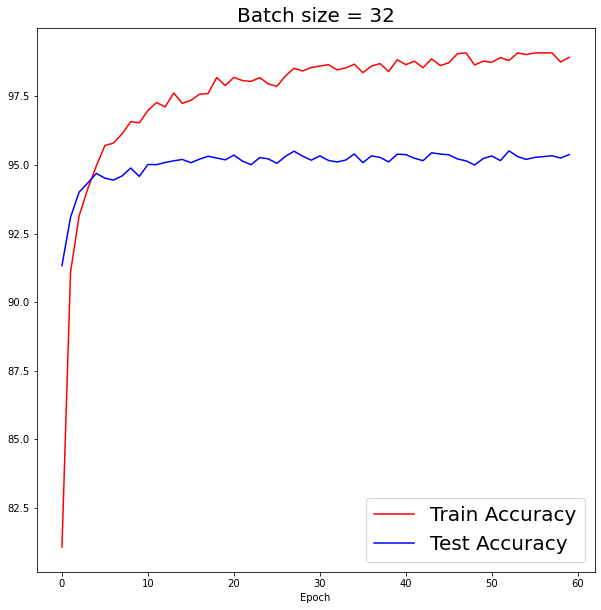

In [33]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_accuracy_history, c='r',label='Train Accuracy')
plt.plot(np.array(range(60)), testing_accuracy_history, c='blue',label='Test Accuracy')
plt.xlabel('Epoch')
plt.title('Batch size = 32',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

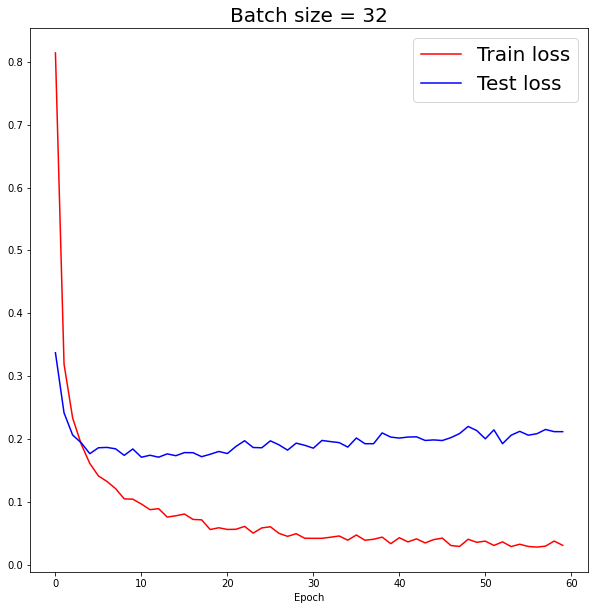

In [35]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(60)), training_loss_history, c='r',label='Train loss')
plt.plot(np.array(range(60)), testing_loss_history, c='blue',label='Test loss')
plt.xlabel('Epoch')
plt.title('Batch size = 32',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

In [ ]:
training_loss_history = []
training_accuracy_history = []
testing_loss_history = []
testing_accuracy_history = []

In [ ]:
for epoch in range(1,epochs+1) :
    classifier.train()
    training_loss = 0
    training_correct = 0
    for i, (data,target) in enumerate(train_loader) :
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        result = classifier(data)

        loss   = F.nll_loss(result, target)
        training_loss += F.nll_loss(result, target, reduction = 'sum').item()

        prediction = result.max(dim = 1, keepdim = True)[1]
        training_correct += prediction.eq(target.view_as(prediction)).sum().item()

        loss.backward()

        optimizer.step()
    training_loss /= len(train_loader.dataset)
    training_accuracy = 100 * training_correct / len(train_loader.dataset)
    training_loss_history.append(training_loss)
    training_accuracy_history.append(training_accuracy)

    classifier.eval()
    testing_loss = 0
    testing_correct = 0
    with torch.no_grad() :
      for data, target in test_loader :
        data, target = data.to(device), target.to(device)
        
        result2 = classifier(data)

        loss2 = F.nll_loss(result2, target)
        testing_loss += F.nll_loss(result2, target,reduction = 'sum').item()

        prediction2 = result2.max(1, keepdim=True)[1]
        testing_correct += prediction2.eq(target.view_as(prediction2)).sum().item()
    testing_loss /= len(test_loader.dataset) 
    testing_accuracy = 100 * testing_correct / len(test_loader.dataset)
    testing_loss_history.append(testing_loss)
    testing_accuracy_history.append(testing_accuracy)

In [ ]:
testing_accuracy

9.913333333333334

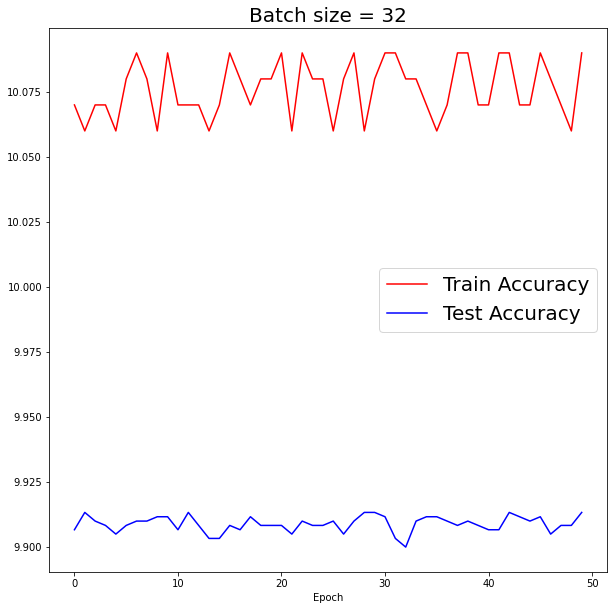

In [ ]:
plt.figure(3, figsize=(10,10))
plt.plot(np.array(range(50)), training_accuracy_history, c='r',label='Train Accuracy')
plt.plot(np.array(range(50)), testing_accuracy_history, c='blue',label='Test Accuracy')
plt.xlabel('Epoch')
plt.title('Batch size = 32',fontsize = 20)
plt.legend(fontsize =20, loc='best')
plt.show()

In [ ]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Sigmoid(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out

In [ ]:
class classification(nn.Module):
  def __init__(self):
    super(classification, self).__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 256)
    self.fc3 = nn.Linear(256, 256)
    self.fc4 = nn.Linear(256, 128)
    self.fc5 = nn.Linear(128, 128)
    self.fc6 = nn.Linear(128, 10)
    
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.dropout(x, training=self.training)
    x = self.fc6(x)
    return F.log_softmax(x)    

In [ ]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()

        self.classifier1 = nn.Sequential(
            nn.Linear(784,48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48,24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24,12),
            nn.BatchNorm1d(12),
            nn.ReLU(),
            nn.Linear(12,10),
            nn.LogSoftmax(dim=1)
            
        )
    def forward(self, x) :
        x = x.view(x.size(0),-1)
        x = self.classifier1(x)
        return x 